In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from funcs.utils import *
import scipy.stats as sps

In [7]:
N = 10000
g_list = [0.1, 0.5, 1, 2]
phi = np.tanh
Tobs = 10000
Tinit = 1000
sigma = 1.0
sigma_n = 0

In [8]:
data = np.load("data/mcscaling_cauchy.npy")
nums = data.shape[1]
max_leadout = data.shape[2]

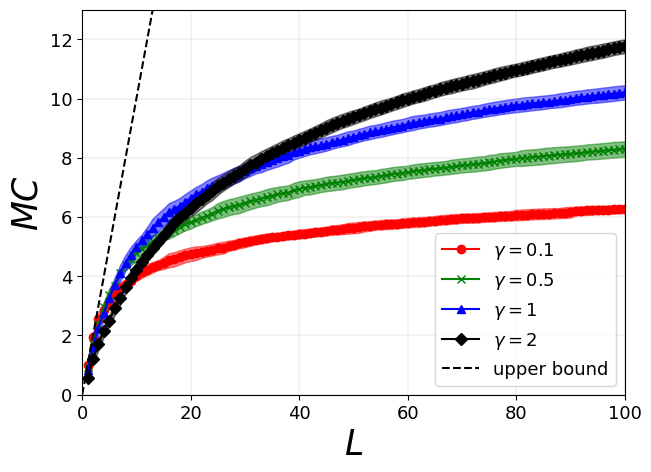

In [9]:
fig = plt.figure(figsize=(7,5))
markers =["o", "x", "^", "D"]
colors = ["red", "green", "blue", "k"]

nums = data.shape[1]
max_leadout = data.shape[2]

for idg, g in enumerate(g_list):
    mcs_mean = np.mean(data[idg,:,:], axis=0)
    mcs_std = np.std(data[idg,:,:], axis=0)
    plt.plot(np.arange(1,max_leadout+1), mcs_mean, markersize=6, marker=markers[idg], label=r"$\gamma=$"+f"{g}", color=colors[idg])
    plt.fill_between(np.arange(1,max_leadout+1),mcs_mean-mcs_std, mcs_mean+mcs_std, alpha=0.5, color=colors[idg])
plt.plot(np.arange(0,max_leadout+1),np.arange(0,max_leadout+1),linestyle="--",color="k", label="upper bound")
plt.xlabel(r"$L$",fontsize=25)
plt.ylabel(r"$MC$",fontsize=25)
plt.tick_params(labelsize=13)
plt.xlim(0,max_leadout)
plt.ylim(0,13)
plt.legend(fontsize=13)
#plt.title(f"Cauchy, N={N}, T={Tobs}, sigma={sigma}, sigma_n={sigma_n}")
plt.grid(linewidth=0.2)
plt.show()

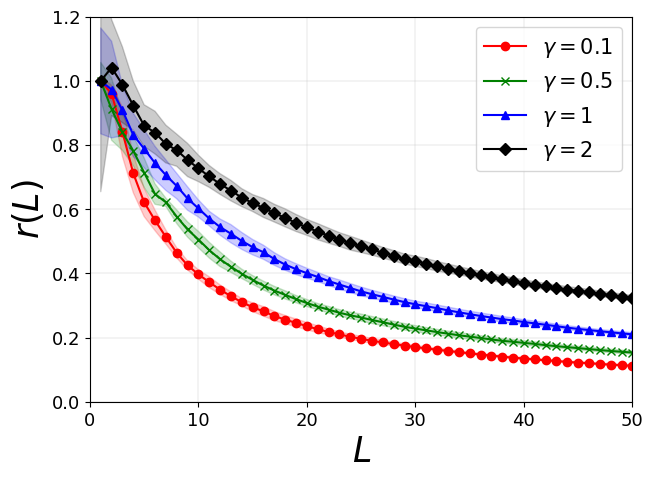

In [10]:
fig = plt.figure(figsize=(7,5))
markers =["o", "x", "^", "D"]
colors = ["red", "green", "blue", "k"]

for idg, g in enumerate(g_list):
    mcs = data[idg,:,:]
    div = np.mean(mcs[:,0],axis=0)*np.ones([nums,1])@(np.arange(1,max_leadout+1).reshape(1,-1))
    ratios = mcs/div
    mean_ratios = np.mean(ratios, axis=0)
    std_ratios = np.std(ratios, axis=0)
    plt.plot(np.arange(1,max_leadout+1), mean_ratios, markersize=6, marker=markers[idg], label=r"$\gamma=$"+f"{g}", color=colors[idg])
    plt.fill_between(np.arange(1,max_leadout+1), mean_ratios+std_ratios, mean_ratios-std_ratios, alpha=0.2, color=colors[idg])

plt.xlabel(r"$L$",fontsize=25)
plt.ylabel(r"$r(L)$",fontsize=25)
plt.tick_params(labelsize=13)
plt.ylim(0,1.2)
plt.xlim(0,50)
plt.legend(fontsize=15)
#plt.title(f"Cauchy, N={N}, T={Tobs}, sigma={sigma}, sigma_n={sigma_n}")
plt.grid(linewidth=0.2)
plt.show()